### This code covers: 

1. Output from Preprocess file created by Shivanshu is considered as input to this code. The preprocessing does not remove stop words. Hence stopwords removal TBD
2. Concated the columns containing text for ticket descrition. Merge "Title" & "Description" into "FullDescription". And used this column for for further processing- Stopword removal and Lemmetization.
3. 2 Extra column created for wordcounts in each document; for word counts before and after NLP Preprocessing. We can use that for visualization.
4. ML Models : Naive Bayes, Logistic Regression, Support Vector Machine-Linear 
5. Deep Learning Model - LSTM(Hyperparamter tuning yet to do !) Keras Tokenizer is used for word_index and text sequences
6. Used 200d word embeddings from Glove glove.6B.200d.txt. We can use 300d as well. Whichever we use we should keep it in our common repo
7. WordCloud created for all the words of all documents. We can use this for visualization. We can further improved/augment it for per assignment group, to see which words are most frequently used for a ticket belonging to a particular group.

TBD:
1. Treat imbalanced data - Upsample, Downsample, SMOTE
2. Try t-SNE for visualization
3. Try more models


In [538]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

import seaborn as sns
import matplotlib.pyplot as plt

tf.__version__

'2.0.0'

In [539]:
data = pd.read_csv("Preprocessed-Tickets.csv")

### Exploratory Data Analysis

In [540]:
data.head()

,Title,Description,Caller,Assignment group
0,login issue,verified user details employee manager name ...,spxjnwir pjlcoqds,GRP_0
1,outlook,hello team meetings skype meetings etc are ...,hmjdrvpb komuaywn,GRP_0
2,cant log to vpn,cannot log to vpn best,eylqgodm ybqkwiam,GRP_0
3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [541]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
Title               8492 non-null object
Description         8499 non-null object
Caller              8500 non-null object
Assignment group    8500 non-null object
dtypes: object(4)
memory usage: 265.7+ KB


In [542]:
# Empty entries
(data.isna() == True).sum()

Title               8
Description         1
Caller              0
Assignment group    0
dtype: int64

In [543]:
data.dtypes

Title               object
Description         object
Caller              object
Assignment group    object
dtype: object

In [544]:
data["Assignment group"].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4      100
GRP_29      97
GRP_18      88
GRP_16      85
GRP_17      81
GRP_31      69
GRP_7       68
GRP_34      62
GRP_26      56
GRP_40      45
GRP_28      44
GRP_41      40
GRP_15      39
GRP_30      39
GRP_42      37
          ... 
GRP_36      15
GRP_44      15
GRP_50      14
GRP_65      11
GRP_53      11
GRP_52       9
GRP_51       8
GRP_55       8
GRP_49       6
GRP_46       6
GRP_59       6
GRP_43       5
GRP_32       4
GRP_66       4
GRP_56       3
GRP_58       3
GRP_63       3
GRP_68       3
GRP_38       3
GRP_69       2
GRP_57       2
GRP_72       2
GRP_71       2
GRP_54       2
GRP_35       1
GRP_70       1
GRP_67       1
GRP_64       1
GRP_61       1
GRP_73       1
Name: Assignment group, Length: 74, dtype: int64

### Findings: 
####  Dataset has 8500 Documents(records) and 4 features(columns). 74 uniqe labes. 8 Titles and 1 Description is null.
#### Dataset is highly imbalanced and skewed ! Around 46% of the dataset is represented by just one class GRP_0. There are many classes that hardly have 1 datapoint. We would need to upsample the under represented class and downsample the strongly represented classes.

In [545]:
# Fill the empty column values with ""  for now, later we would merge the Title and Description Columns
data.fillna("", inplace=True)

In [546]:
# concat the two columns
data['FullDescription'] = data['Title'] + data['Description']
(pd.isna(data['FullDescription']) == True).sum()

0

In [547]:
data.drop(columns=['Title', 'Description', 'Caller'], inplace=True)

In [548]:
data['WordCountBefore'] = [len(desc.split(' ')) for desc in data['FullDescription']]

In [549]:
data.head()

,Assignment group,FullDescription,WordCountBefore
0,GRP_0,login issue verified user details employee ma...,33
1,GRP_0,outlook hello team meetings skype meetings e...,24
2,GRP_0,cant log to vpn cannot log to vpn best,12
3,GRP_0,unable access tool pageunable access tool page,7
4,GRP_0,skype error skype error,5


In [550]:
wordCount_before = data['WordCountBefore'].sum()
print("Total Words: ", wordCount_before)

Total Words:  292035


### Visualization

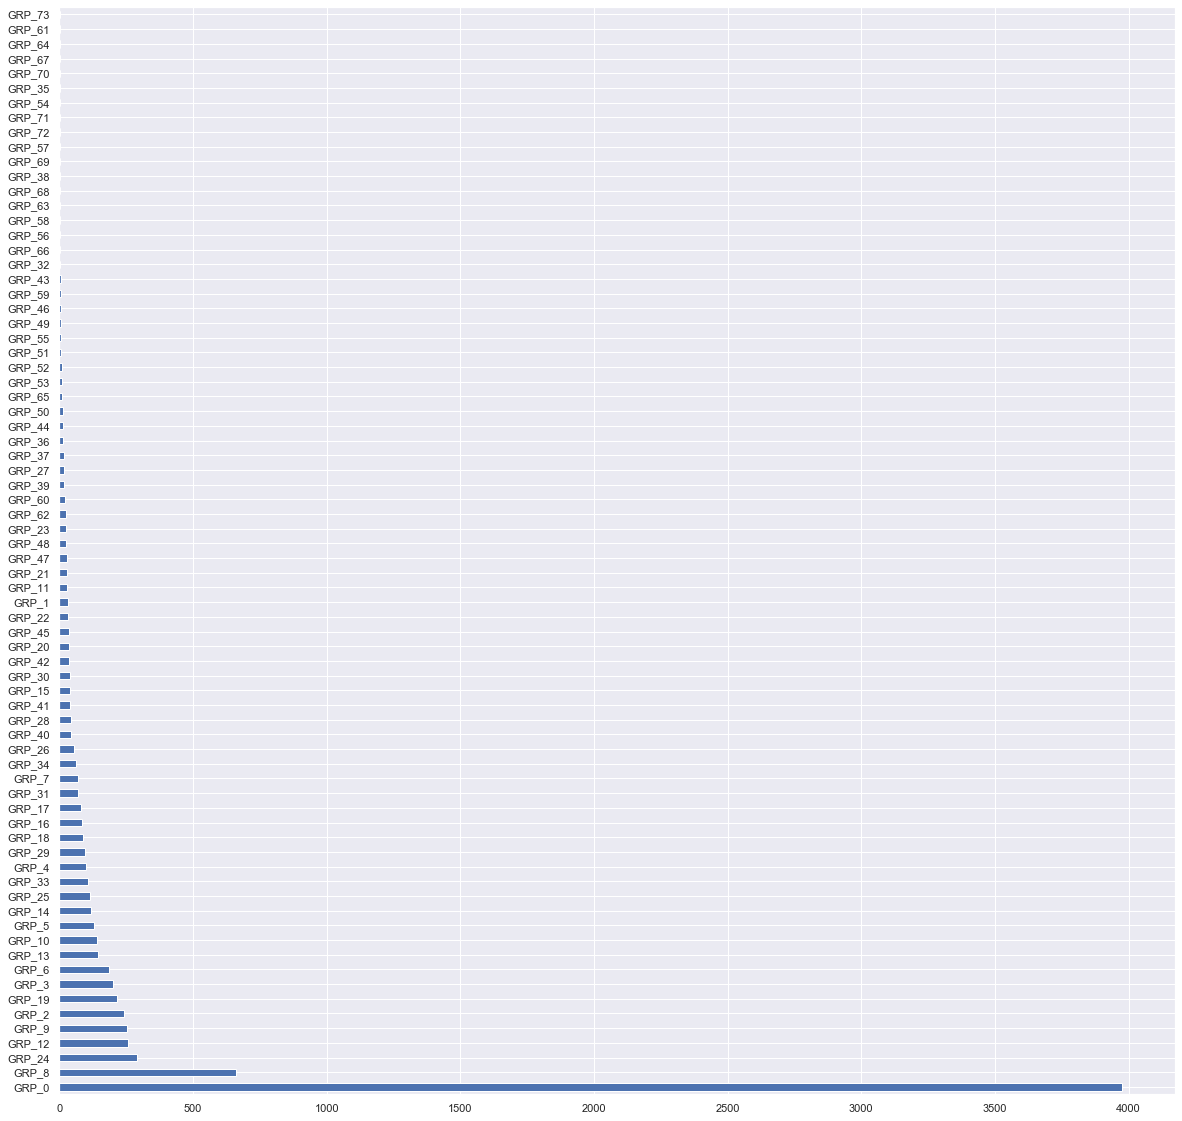

In [551]:
data['Assignment group'].value_counts().plot(kind='barh', figsize=(20,20))

### WordCloud

#### Word Cloud for one document

login issue verified user details employee  manager name checked the user name ad and reset the password advised the user login and check caller confirmed that was able login issue resolved 
33


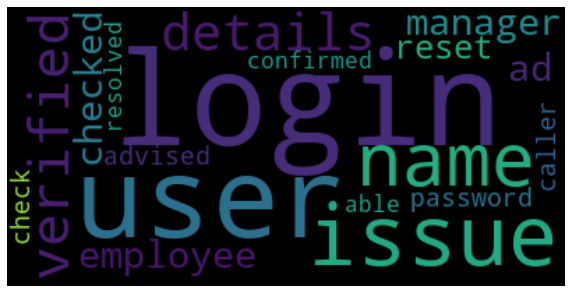

In [552]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

# Start with one description:
text = data.FullDescription[0]

print(text)
print(len(text.split(' ')))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Word Cloud for corpus

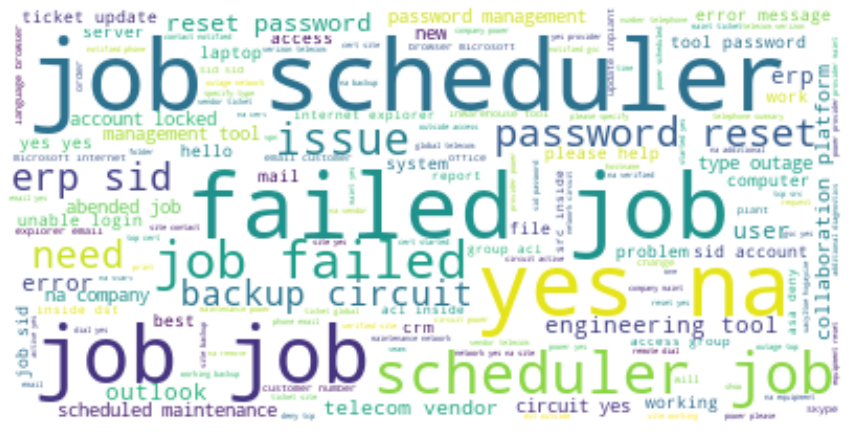

In [553]:
All_words = ""
All_words += " ".join(data.FullDescription)
wordcloud = WordCloud(background_color='white').generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [554]:
# Save the image in the img folder:
wordcloud.to_file("first_review.png")

### Data Pre-Processing

### NLP Essentials : Stopwords Removal & Text Normalization (Lemmetization)

#### Remove Stopwords

1. Text Classification
2. Spam Filtering
3. Language Classification
4. Genre Classification
5. Caption Generation
6. Auto-Tag Generation
 
#### Avoid Stopword Removal

1. Machine Translation
2. Language Modeling
3. Text Summarization
4. Question-Answering problems (Chatbots)

In [555]:
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
# We will not do stemming, instead use more intelligent way to get the root word using  lemmatization
from nltk.stem import WordNetLemmatizer

In [556]:
stop_words = set(stopwords.words('english')) 

In [557]:
all_documents_list = data["FullDescription"].values.tolist()
print("No. of Documents: ", len(all_documents_list))

No. of Documents:  8500


In [558]:
#all_documents_list

In [559]:
#data['DescriptionWordCount'] = [len(desc.split(' ')) for desc in all_documents_list]
#print("Max number of characters in a FullDescription", max([len(desc) for desc in all_documents_list]))
#print("Max word count: ", data['TicketWordCount'].max())
#print("Mean word count: ", data['TicketWordCount'].mean())

In [560]:
data.head(10)

,Assignment group,FullDescription,WordCountBefore
0,GRP_0,login issue verified user details employee ma...,33
1,GRP_0,outlook hello team meetings skype meetings e...,24
2,GRP_0,cant log to vpn cannot log to vpn best,12
3,GRP_0,unable access tool pageunable access tool page,7
4,GRP_0,skype error skype error,5
5,GRP_0,unable log to engineering tool and skypeunable...,13
6,GRP_1,event critical hostname company com the value...,39
7,GRP_0,ticket employment status new non employee ent...,21
8,GRP_0,unable disable add ins outlookunable disable a...,9
9,GRP_0,ticket update inplant ticket update inplant,7


In [561]:
#nltk.download('wordnet')

In [562]:
processed_all_documents = list()

for desc in all_documents_list:
    word_tokens = word_tokenize(desc) 
    
    filtered_sentence = [] 

    # Removing Stopwords
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    # Lemmetization
    lemma_word = []
    wordnet_lemmatizer = WordNetLemmatizer()
    for w in filtered_sentence:
        word1 = wordnet_lemmatizer.lemmatize(w, pos = "n")
        word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
        word3 = wordnet_lemmatizer.lemmatize(word2, pos = ("a"))
        lemma_word.append(word3)
    words = ' '.join(lemma_word)
    processed_all_documents.append(words)    

In [563]:
len(processed_all_documents)

8500

In [564]:
data['FullDescription'] = processed_all_documents

In [565]:
data['WordCountAfter'] = [len(desc.split(' ')) for desc in data['FullDescription']]

wordCount_after = data['WordCountAfter'].sum()
print("Total Words After StopWords Removal & Lemmetization: ", wordCount_after)
print("Max word count of a Document: ", data['WordCountAfter'].max())
print("Mean word count of Documents: ", data['WordCountAfter'].mean())

Total Words After StopWords Removal & Lemmetization:  178893
Max word count of a Document:  876
Mean word count of Documents:  21.046235294117647


In [566]:
data.head()

,Assignment group,FullDescription,WordCountBefore,WordCountAfter
0,GRP_0,login issue verify user detail employee manage...,33,24
1,GRP_0,outlook hello team meet skype meet etc appear ...,24,15
2,GRP_0,cant log vpn log vpn best,12,6
3,GRP_0,unable access tool pageunable access tool page,7,7
4,GRP_0,skype error skype error,5,4


In [567]:
print("Difference in Total WordCount Before & After NLP Preprocessing: ", (wordCount_before - wordCount_after))

Difference in Total WordCount Before & After NLP Preprocessing:  113142


In [568]:
processed_all_documents

['login issue verify user detail employee manager name check user name ad reset password advise user login check caller confirm able login issue resolve',
 'outlook hello team meet skype meet etc appear outlook calendar somebody please advise correct kind',
 'cant log vpn log vpn best',
 'unable access tool pageunable access tool page',
 'skype error skype error',
 'unable log engineer tool skypeunable log engineer tool skype',
 'event critical hostname company com value mountpoint threshold oracle sid erpdata event critical hostname company com value mountpoint threshold oracle sid erpdata psa psa data perpsr psa',
 'ticket employment status new non employee enter user name ticket employment status new non employee enter user name',
 'unable disable add in outlookunable disable add in outlook',
 'ticket update inplant ticket update inplant',
 'engineer tool say connect unable submit reportsengineering tool say connect unable submit report',
 'hr tool site load page correctlyhr tool si

### Label Encode the Target Column

In [569]:
le = preprocessing.LabelEncoder()
le.fit(data["Assignment group"])
y_classes_len = len(le.classes_)
le.classes_
print(y_classes_len)
data["Assignment group"] = le.transform(data["Assignment group"])
data.FullDescription[0]

74


'login issue verify user detail employee manager name check user name ad reset password advise user login check caller confirm able login issue resolve'

### Creating Machine Learning Models

In [570]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report

In [571]:
count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(data['FullDescription'])

#print(x_train_counts[0])

tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

#print(x_train_tfidf)

train_x, test_x, train_y, test_y = train_test_split(x_train_tfidf, y, test_size=0.3)

In [572]:
print(len(count_vect.vocabulary_))

14138


In [573]:
train_x.shape

(5950, 14138)

In [574]:
train_y.shape

(5950,)

In [575]:
test_x.shape

(2550, 14138)

In [576]:
test_y.shape

(2550,)

In [577]:
train_x[0]

<1x14138 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

### Logistic Regression

In [578]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(train_x, train_y)
y_pred = clf.predict(test_x)
acc_score = accuracy_score(test_y, y_pred)
print("Logistic Regression Score: ", acc_score)
f_sc = f1_score(test_y, y_pred, average='weighted')
print("Logistic Regression F1 Score: ", f_sc)

Logistic Regression Score:  0.6290196078431373
Logistic Regression F1 Score:  0.5361299675787248


C:\Users\shard\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\shard\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Naive Bayes

In [579]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(train_x, train_y)
y_pred = clf.predict(test_x)
acc_score = accuracy_score(test_y, y_pred)
print("Naive Bayes Score: ", acc_score)
f_sc = f1_score(test_y, y_pred, average='weighted')
print("Naive Bayes F1 Score: ", f_sc)

Naive Bayes Score:  0.5596078431372549
Naive Bayes F1 Score:  0.41512649082654035


C:\Users\shard\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


###  Support Vector Machine - Linear

In [580]:
from sklearn.svm import SVC
clf = SVC(kernel='linear').fit(train_x, train_y)
y_pred = clf.predict(test_x)
acc_score = accuracy_score(test_y, y_pred)
print("SVM-Linerar Score: ", acc_score)
f_sc = f1_score(test_y, y_pred, average='weighted')
print("SVM F1 Score: ", f_sc)

SVM-Linerar Score:  0.6607843137254902
SVM F1 Score:  0.5855697982732342


C:\Users\shard\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Deep Learning Models

In [581]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [582]:
# filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
#filters='!"#$%&()*+,-/:;<=>?@[\\]^_`{|}~\t\n\r0123456789'
max_ticket_desc_length = 300

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['FullDescription'])

In [583]:
tokenizer_word_index = tokenizer.word_index

In [584]:
len(tokenizer_word_index)

14161

In [585]:
corpus_words = tokenizer_word_index.keys()

In [586]:
corpus_words

dict_keys(['job', 'password', 'please', 'yes', 'scheduler', 'erp', 'fail', 'tool', 'user', 'na', 'company', 'sid', 'access', 'reset', 'issue', 'ticket', 'account', 'unable', 'work', 'email', 'error', 'hostname', 'need', 'site', 'outlook', 'login', 'get', 'help', 'system', 'update', 'circuit', 'power', 'network', 'use', 'name', 'lock', 'change', 'vendor', 'event', 'connect', 'server', 'hello', 'engineer', 'log', 'see', 'new', 'open', 'report', 'message', 'backup', 'able', 'call', 'window', 'request', 'usa', 'check', 'telecom', 'phone', 'vpn', 'time', 'try', 'outage', 'start', 'team', 'crm', 'type', 'printer', 'order', 'skype', 'number', 'problem', 'device', 'customer', 'send', 'inside', 'plant', 'contact', 'print', 'file', 'since', 'mit', 'create', 'manager', 'et', 'collaboration', 'unlock', 'management', 'best', 'f', 'microsoft', 'attach', 'data', 'connection', 'show', 'platform', 'com', 'schedule', 'tcp', 'service', 'summary', 'maintenance', 'software', 'sale', 'mail', 'add', 'abended

In [587]:
X = tokenizer.texts_to_sequences(data['FullDescription'])

In [588]:
len(X)

8500

In [589]:
X = pad_sequences(X, maxlen = max_ticket_desc_length)
print(X)

[[    0     0     0 ...    26    15   128]
 [    0     0     0 ...   208   286   384]
 [    0     0     0 ...    44    59    88]
 ...
 [    0     0     0 ...    14  6959 14159]
 [    0     0     0 ...  5524   134    33]
 [    0     0     0 ...   961  2880  2502]]


In [590]:
y = np.asarray(data['Assignment group'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 8500
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   

In [591]:
print(y)

[ 0  0  0 ...  0 59 44]


In [592]:
print(X.shape)
print(y.shape)

(8500, 300)
(8500,)


In [593]:
vocab_size = len(tokenizer_word_index) + 1 # 1 here is added to reserve padding
print("Vocabulary size : ", vocab_size)

Vocabulary size :  14162


### Creating word embeddings using Glove Embeddings
#### TBD: Checkout Elmo and BERT embeddings
#### TBD: Also checkout 300d or 500d of Glove embeddings

In [594]:
EMBEDDING_FILE = './glove.6B.200d.txt'
embedding_dim = 200

glove_embeddings = {}
for o in open(EMBEDDING_FILE, encoding="utf8"):
    word = o.split(" ")[0]
    #print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    #print(embd)
    glove_embeddings[word] = embd


In [595]:
print(len(glove_embeddings))

400000


### Create weight matrix for words in all documents (words obtained from tokenizer) using Glove Embeddings

In [596]:
embedding_matrix = np.zeros((vocab_size, embedding_dim) )

In [597]:
for word, i in tokenizer_word_index.items():
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [598]:
embedding_matrix.shape

(14162, 200)

### Create and Compile Model

In [599]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional, Dropout, Conv1D, Flatten

In [600]:
model = Sequential()

In [601]:
model.add(Embedding(vocab_size, embedding_dim, weights = [embedding_matrix]))
model.add(LSTM(units=32, dropout=0.2, recurrent_dropout=0.25))
#model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(y_classes_len, activation='softmax'))

In [602]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 200)         2832400   
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                29824     
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_6 (Dense)              (None, 74)                7474      
Total params: 2,872,998
Trainable params: 2,872,998
Non-trainable params: 0
_________________________________________________________________


In [603]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [604]:

y_labels = tf.keras.utils.to_categorical(y, y_classes_len)

batch_size = 32
epochs = 15

model.fit(X, y_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)

Train on 6800 samples, validate on 1700 samples
Epoch 1/15
6800/6800 [==============================] - 65s 9ms/sample - loss: 2.5206 - accuracy: 0.5021 - val_loss: 2.1552 - val_accuracy: 0.5082
Epoch 2/15
6800/6800 [==============================] - 40s 6ms/sample - loss: 1.9650 - accuracy: 0.5585 - val_loss: 1.9916 - val_accuracy: 0.5359
Epoch 3/15
6800/6800 [==============================] - 38s 6ms/sample - loss: 1.7881 - accuracy: 0.5771 - val_loss: 1.9194 - val_accuracy: 0.5500
Epoch 4/15
6800/6800 [==============================] - 37s 5ms/sample - loss: 1.6347 - accuracy: 0.5913 - val_loss: 1.8503 - val_accuracy: 0.5594
Epoch 5/15
6800/6800 [==============================] - 33s 5ms/sample - loss: 1.4982 - accuracy: 0.6107 - val_loss: 1.8071 - val_accuracy: 0.5653
Epoch 6/15
6800/6800 [==============================] - 37s 5ms/sample - loss: 1.3802 - accuracy: 0.6310 - val_loss: 1.7991 - val_accuracy: 0.5765
Epoch 7/15
6800/6800 [==============================] - 34s 5ms/sample

### TBD : t-SNE

In [ ]:
from sklearn.manifold import TSNE

# dimensionality reduction. converting the vectors to 2d vectors
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(embedding_matrix)

# putting everything in a dataframe
tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])
tsne_df['words'] = list(wor)[:5000]

# plotting. the corresponding word appears when you hover on the data point.
plot_tfidf.scatter(x='x', y='y', source=tsne_df)
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"word": "@words"}
show(plot_tfidf)

### TBD: Solve Class Imbalance

In [ ]:
from sklearn.utils import resample
train_majority = train_clean[train_clean.label==0]
train_minority = train_clean[train_clean.label==1]
train_minority_upsampled = resample(train_minority, 
                                 replace=True,    
                                 n_samples=len(train_majority),   
                                 random_state=123)
train_upsampled = pd.concat([train_minority_upsampled, train_majority])
train_upsampled['label'].value_counts()


train_majority = train_clean[train_clean.label==0]
train_minority = train_clean[train_clean.label==1]
 
train_majority_downsampled = resample(train_majority, 
                                 replace=True,  
                                 n_samples=len(train_minority),   
                                 random_state=123)
train_downsampled = pd.concat([train_majority_downsampled, train_minority])
train_downsampled['label'].value_counts()